# **DATA PREPROCESSING**

# Input variables:

**bank client data:**
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable (desired target):**
16 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [208]:
data=pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [209]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Subscribed'],
      dtype='object')

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  Subscribed  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [211]:
from sklearn.preprocessing import LabelEncoder
data['Subscribed_enc']=LabelEncoder().fit_transform(data[['Subscribed']])
data['job'] =LabelEncoder().fit_transform(data[['job']])
data['marital'] =LabelEncoder().fit_transform(data[['marital']])
data['education'] =LabelEncoder().fit_transform(data[['education']])
data['default'] =LabelEncoder().fit_transform(data[['default']])
data['housing'] =LabelEncoder().fit_transform(data[['housing']])
data['loan'] =LabelEncoder().fit_transform(data[['loan']])
data['contact'] =LabelEncoder().fit_transform(data[['contact']])
data['month'] =LabelEncoder().fit_transform(data[['month']])
data['poutcome'] =LabelEncoder().fit_transform(data[['poutcome']])
data.head()

C:\Users\vivien\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,Subscribed_enc
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no,0


In [212]:
data.drop(columns='Subscribed',axis=1,inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed_enc
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             4521 non-null   int64
 1   job             4521 non-null   int32
 2   marital         4521 non-null   int32
 3   education       4521 non-null   int32
 4   default         4521 non-null   int32
 5   balance         4521 non-null   int64
 6   housing         4521 non-null   int32
 7   loan            4521 non-null   int32
 8   contact         4521 non-null   int32
 9   day             4521 non-null   int64
 10  month           4521 non-null   int32
 11  duration        4521 non-null   int64
 12  campaign        4521 non-null   int64
 13  pdays           4521 non-null   int64
 14  previous        4521 non-null   int64
 15  poutcome        4521 non-null   int32
 16  Subscribed_enc  4521 non-null   int32
dtypes: int32(10), int64(7)
memory usage: 424.0 KB


# Data Exploration

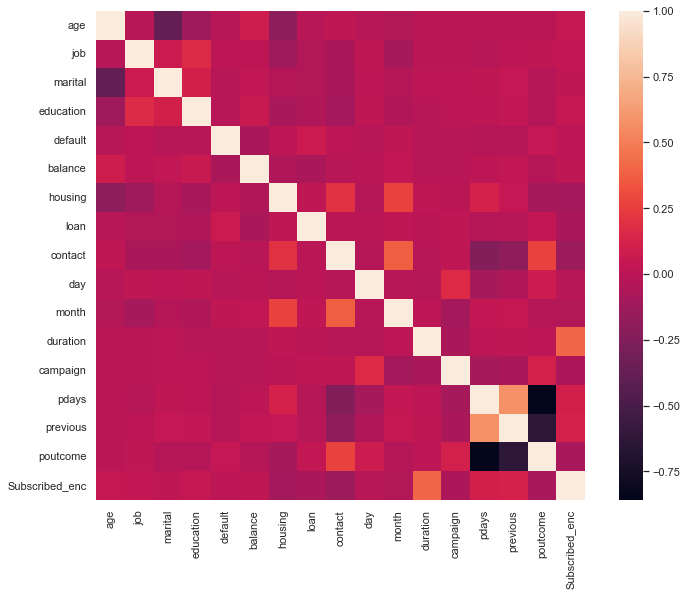

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

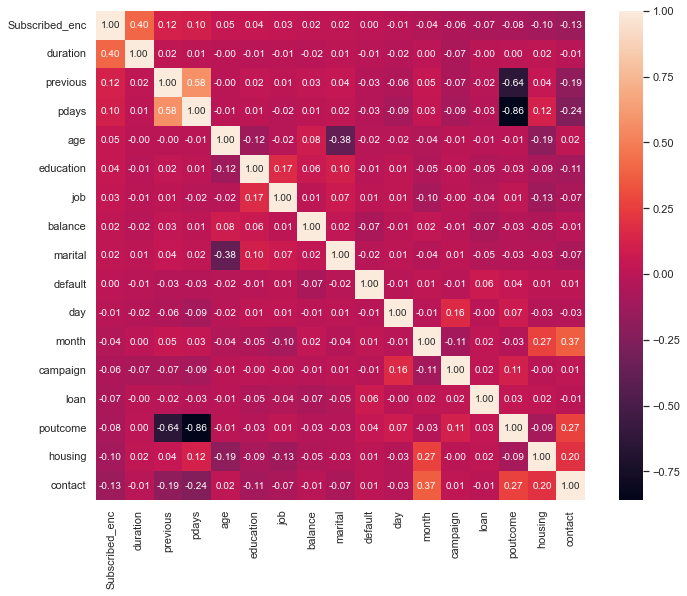

In [215]:
#correlation matrix
k = len(data.columns) #number of variables for heatmap
cols = corrmat.nlargest(k, 'Subscribed_enc')['Subscribed_enc'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [216]:
#Remove correlation below 0.0
data.drop('day',axis=1,inplace=True)
data.drop('month',axis=1,inplace=True)
data.drop('campaign',axis=1,inplace=True)
data.drop('loan',axis=1,inplace=True)
data.drop('poutcome',axis=1,inplace=True)
data.drop('contact',axis=1,inplace=True)
data.drop('housing',axis=1,inplace=True)
data.head()


,age,job,marital,education,default,balance,duration,pdays,previous,Subscribed_enc
0,30,10,1,0,0,1787,79,-1,0,0
1,33,7,1,1,0,4789,220,339,4,0
2,35,4,2,2,0,1350,185,330,1,0
3,30,4,1,2,0,1476,199,-1,0,0
4,59,1,1,1,0,0,226,-1,0,0


## Prepare train and test dataset

In [217]:
#creating our X feature variables and y outcome variable
X = data.drop('Subscribed_enc',axis=1)
y = data['Subscribed_enc']

In [218]:
#splitting our data into training and testing data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Random Forest Classification**

In [219]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [220]:
#To predict target outcome using the test's set features
clf_pred=clf.predict(X_test)
print(clf_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [221]:
# Transfer the array of predicted popularity of test data into dataframe
clf_pred_df = pd.DataFrame(data=clf_pred, columns=['Subscribed_enc'])
clf_pred_df.head(10)

,Subscribed_enc
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [222]:
RFprob_each = clf.predict_proba(X_test)
RFprob_each

array([[0.41, 0.59],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.54, 0.46]])

In [223]:
pos_prob = []
for inner in RFprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.59, 0.0, 0.02, 0.0, 0.04, 0.36, 0.04, 0.41, 0.24, 0.0]

In [224]:
X_testdf = X_test.copy()
X_testdf.insert(len(X_testdf.columns),'y_test Subscribed_enc',y_test)
X_testdf=X_testdf.reset_index(drop=True)
X_testdf

,age,job,marital,education,default,balance,duration,pdays,previous,y_test Subscribed_enc
0,43,0,0,1,0,738,585,191,4,0
1,39,9,2,2,0,-41,40,-1,0,0
2,52,3,1,1,0,14363,132,-1,0,0
3,32,0,2,1,0,739,91,-1,0,0
4,33,3,1,0,0,212,260,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
900,43,0,1,1,0,3215,228,-1,0,0
901,45,9,1,1,0,115,108,-1,0,0
902,36,10,1,1,0,-129,121,-1,0,0
903,48,9,1,1,0,17,81,-1,0,0


In [225]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'RForest', clf_pred_df['Subscribed_enc'])
X_testdf

,age,job,marital,education,default,balance,duration,pdays,previous,y_test Subscribed_enc,RForest
0,43,0,0,1,0,738,585,191,4,0,1
1,39,9,2,2,0,-41,40,-1,0,0,0
2,52,3,1,1,0,14363,132,-1,0,0,0
3,32,0,2,1,0,739,91,-1,0,0,0
4,33,3,1,0,0,212,260,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
900,43,0,1,1,0,3215,228,-1,0,0,0
901,45,9,1,1,0,115,108,-1,0,0,0
902,36,10,1,1,0,-129,121,-1,0,0,0
903,48,9,1,1,0,17,81,-1,0,0,0


# **Naive Bayes**

In [226]:
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB()

In [227]:
#To predict target outcome using the test's set features
NB_pred= gaus.predict(X_test)
print(NB_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [228]:
# Transfer the array of predicted popularity of test data into dataframe
NB_pred_df = pd.DataFrame(data=NB_pred, columns=['Subscribed_enc'])
NB_pred_df.head(10)

,Subscribed_enc
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [229]:
NBprob_each = gaus.predict_proba(X_test)
NBprob_each

array([[3.92890591e-01, 6.07109409e-01],
       [9.69550665e-01, 3.04493347e-02],
       [9.99812669e-01, 1.87330517e-04],
       ...,
       [9.79951795e-01, 2.00482048e-02],
       [9.75530084e-01, 2.44699159e-02],
       [7.11260073e-01, 2.88739927e-01]])

In [230]:
pos_prob = []
for inner in NBprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.6071094091596785,
 0.030449334700083642,
 0.00018733051654847168,
 0.021856373490897668,
 0.019711906907771973,
 0.20832793044362563,
 0.025847305172614063,
 0.3414435067191407,
 0.10069373222918061,
 0.01411378190186284]

In [231]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'NBGaus', NB_pred_df['Subscribed_enc'])
X_testdf

,age,job,marital,education,default,balance,duration,pdays,previous,y_test Subscribed_enc,RForest,NBGaus
0,43,0,0,1,0,738,585,191,4,0,1,1
1,39,9,2,2,0,-41,40,-1,0,0,0,0
2,52,3,1,1,0,14363,132,-1,0,0,0,0
3,32,0,2,1,0,739,91,-1,0,0,0,0
4,33,3,1,0,0,212,260,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900,43,0,1,1,0,3215,228,-1,0,0,0,0
901,45,9,1,1,0,115,108,-1,0,0,0,0
902,36,10,1,1,0,-129,121,-1,0,0,0,0
903,48,9,1,1,0,17,81,-1,0,0,0,0


# **KNN Classification**

In [232]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

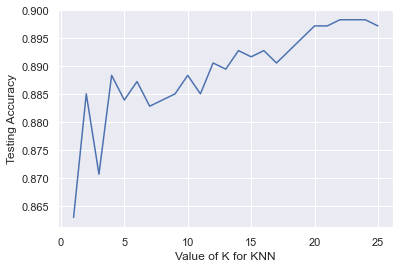

In [233]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [234]:
#Selection of n_neighbours as we do not want to underfit / overfit
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [235]:
#To predict target outcome using the test's set features
KNN_pred= knn.predict(X_test)
print(KNN_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [236]:
# Transfer the array of predicted popularity of test data into dataframe
KNpredct_df = pd.DataFrame(data=KNN_pred, columns=['Subscribed_enc'])
KNpredct_df.head(10)

,Subscribed_enc
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [237]:
KNprob_each = knn.predict_proba(X_test)
KNprob_each

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       ...,
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.58333333, 0.41666667]])

In [238]:
pos_prob = []
for inner in KNprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.3333333333333333,
 0.0,
 0.08333333333333333,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.0,
 0.3333333333333333,
 0.08333333333333333,
 0.0]

In [239]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'KNeigh', KNpredct_df['Subscribed_enc'])
X_testdf


,age,job,marital,education,default,balance,duration,pdays,previous,y_test Subscribed_enc,RForest,NBGaus,KNeigh
0,43,0,0,1,0,738,585,191,4,0,1,1,0
1,39,9,2,2,0,-41,40,-1,0,0,0,0,0
2,52,3,1,1,0,14363,132,-1,0,0,0,0,0
3,32,0,2,1,0,739,91,-1,0,0,0,0,0
4,33,3,1,0,0,212,260,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,43,0,1,1,0,3215,228,-1,0,0,0,0,0
901,45,9,1,1,0,115,108,-1,0,0,0,0,0
902,36,10,1,1,0,-129,121,-1,0,0,0,0,0
903,48,9,1,1,0,17,81,-1,0,0,0,0,0


# **Decision Tree**

In [240]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [241]:
#To predict target outcome using the test's set features
model_pred=model.predict(X_test)
print(model_pred)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [242]:
# Transfer the array of predicted popularity of test data into dataframe
model_pred_df = pd.DataFrame(data=model_pred, columns=['Subscribed_enc'])
model_pred_df.head(10)

,Subscribed_enc
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [243]:
DTprob_each = model.predict_proba(X_test)
DTprob_each

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [244]:
pos_prob = []
for inner in DTprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

In [245]:
# Insert result, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'DecisionT', model_pred_df['Subscribed_enc'])
X_testdf

,age,job,marital,education,default,balance,duration,pdays,previous,y_test Subscribed_enc,RForest,NBGaus,KNeigh,DecisionT
0,43,0,0,1,0,738,585,191,4,0,1,1,0,1
1,39,9,2,2,0,-41,40,-1,0,0,0,0,0,0
2,52,3,1,1,0,14363,132,-1,0,0,0,0,0,0
3,32,0,2,1,0,739,91,-1,0,0,0,0,0,0
4,33,3,1,0,0,212,260,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,43,0,1,1,0,3215,228,-1,0,0,0,0,0,0
901,45,9,1,1,0,115,108,-1,0,0,0,0,0,0
902,36,10,1,1,0,-129,121,-1,0,0,0,0,0,0
903,48,9,1,1,0,17,81,-1,0,0,0,0,0,0


# **Evaluation of Classifiers**

In [246]:
#Import relevant metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [247]:
#RANDOM FOREST
acRF=accuracy_score(y_test,clf_pred)
fscoreRF=f1_score(y_test,clf_pred)
conmatrixRF = confusion_matrix(y_test,clf_pred)

#NAIVE BAYES
acNB=accuracy_score(y_test,NB_pred)
fscoreNB = f1_score(y_test,NB_pred)
conmatrixNB = confusion_matrix(y_test,NB_pred)

#K NEIGHBOURS
acKNN=accuracy_score(y_test,KNN_pred)
fscoreKNN=f1_score(y_test,KNN_pred)
conmatrixKNN = confusion_matrix(y_test,KNN_pred)

#DECISION TREE
acDTree = accuracy_score(y_test,model_pred)
fscoreDTree = f1_score(y_test,model_pred)
conmatrixDTree = confusion_matrix(y_test,model_pred)


In [248]:
df = pd.DataFrame(
    {
        "KNeigh": [acKNN, fscoreKNN, conmatrixKNN],
        "Naive Bayes": [acNB, fscoreNB, conmatrixNB],
        "Random Forest": [acRF, fscoreRF, conmatrixRF],
        "Decision Tree": [acDTree, fscoreDTree, conmatrixDTree]
    },
    columns=["KNeigh", "Naive Bayes", "Random Forest", "Decision Tree"],
    index = ["Accuracy", "Fscore", "Confusion Matrix"])
df



,KNeigh,Naive Bayes,Random Forest,Decision Tree
Accuracy,0.890608,0.879558,0.895028,0.866298
Fscore,0.074766,0.322981,0.274809,0.373057
Confusion Matrix,"[[802, 12], [87, 4]]","[[770, 44], [65, 26]]","[[792, 22], [73, 18]]","[[748, 66], [55, 36]]"
